In [1]:
import mysql.connector
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#import plotly

In [2]:
mydb = mysql.connector.connect(
  host="localhost",
  user="face",
  passwd="Rat@67",
  database="faceReco"
)

In [3]:
#print(mydb)

In [4]:
mycursor = mydb.cursor()

mycursor.execute("SELECT DATE_FORMAT(`readingDate`, '%m-%Y'), \
    SUM(`ktraction`),  \
    SUM(`knonTraction`), \
    SUM(`atraction`),  \
    SUM(`anonTraction`) \
    FROM energy_readings \
    GROUP BY DATE_FORMAT(`readingDate`, '%m-%Y'), \
    MONTH(`readingDate`), YEAR(`readingDate`) \
    ORDER BY YEAR(`readingDate`), MONTH(`readingDate`)")

myresult = mycursor.fetchall()

Month = []
KRSS_Traction = []
KRSS_Non_Traction = []
ARSS_Traction = []
ARSS_Non_Traction = []
Traction = []
Non_Traction = []
Total = []

for row in myresult:
    Month.append(row[0])
    KRSS_Non_Traction.append(row[1])    
    KRSS_Traction.append(row[2])
    ARSS_Non_Traction.append(row[3])
    ARSS_Traction.append(row[4])
    Traction.append(row[2] + row[4])
    Non_Traction.append(row[1] + row[3])
    Total.append(row[1] + row[2] + row[3] + row[4])

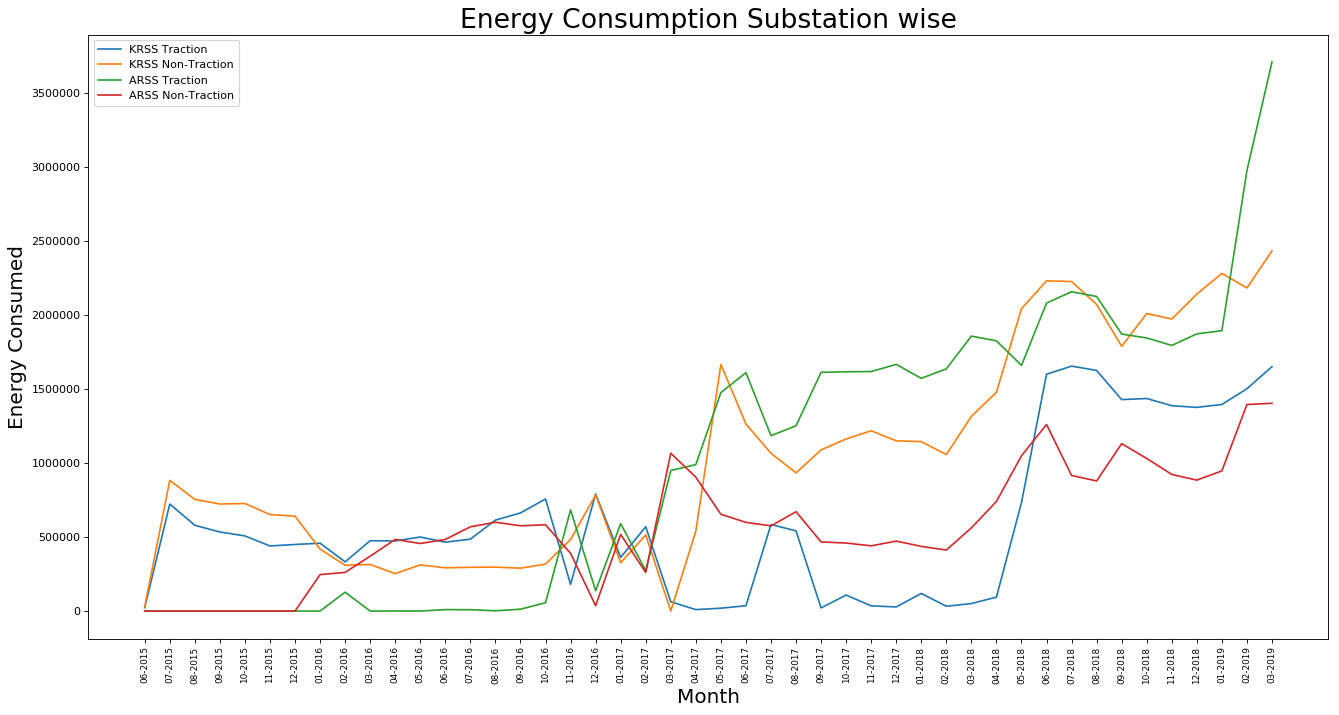

In [13]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(Month, KRSS_Traction, label = 'KRSS Traction')
plt.plot(Month, KRSS_Non_Traction, label = 'KRSS Non-Traction')
plt.plot(Month, ARSS_Traction, label = 'ARSS Traction')
plt.plot(Month, ARSS_Non_Traction, label = 'ARSS Non-Traction')
plt.rc('xtick', labelsize=8) 
plt.xticks(rotation=90)
plt.rc('axes', titlesize=24)
plt.rc('axes', labelsize=18)
plt.xlabel("Month")
plt.ylabel("Energy Consumed")
plt.title("Energy Consumption Substation wise")
plt.legend()

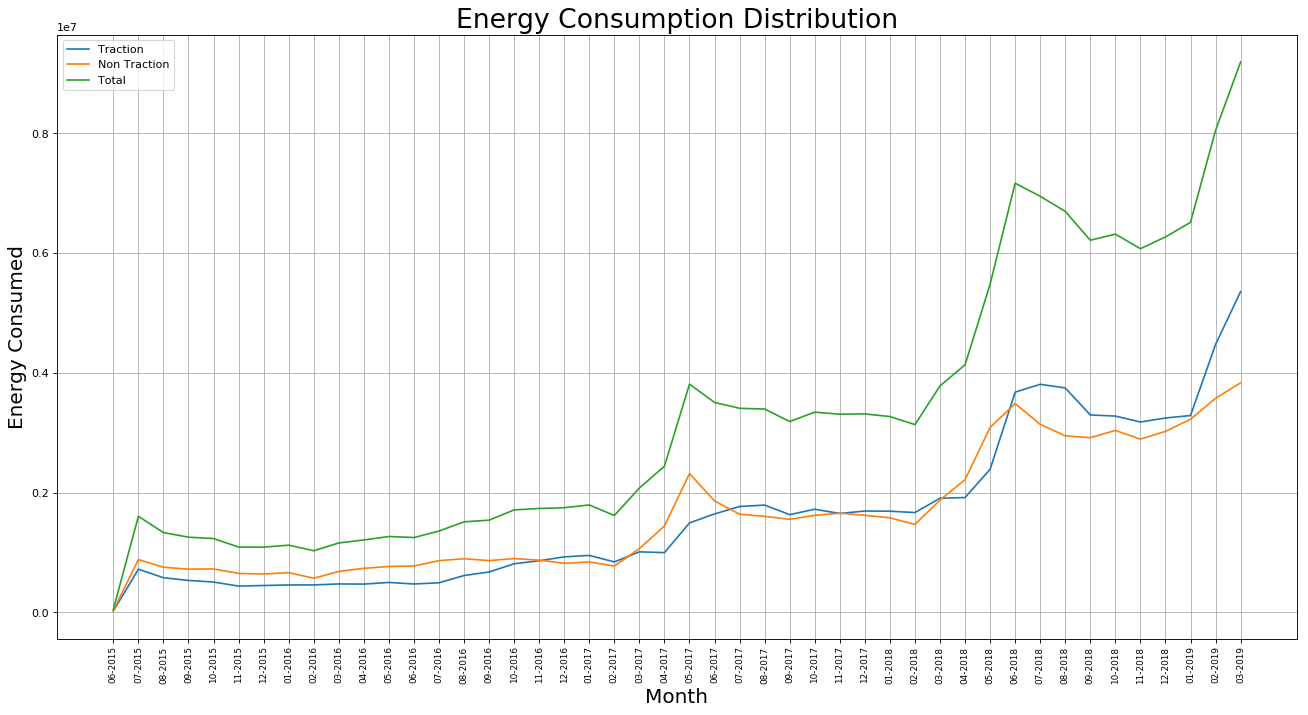

In [14]:
figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(Month, Traction, label = 'Traction')
plt.plot(Month, Non_Traction, label = 'Non Traction')
plt.plot(Month, Total, label = 'Total')
plt.rc('xtick', labelsize=8) 
plt.xticks(rotation=90)
plt.rc('axes', titlesize=24)
plt.rc('axes', labelsize=18)
plt.grid()
plt.xlabel("Month")
plt.ylabel("Energy Consumed")
plt.title("Energy Consumption Distribution")
plt.legend()
